# Numerische Lösung der Wärmeleitungsgleichung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [74]:
%%time
D = 1.0
L = 1.0
T = 0.05


NX =  1000 # Anzahl der räumlichen Gitterpunkte
deltaX = L/NX
alpha = 0.4
NT = int(D*T/(deltaX*deltaX*alpha))
NT
# Randbedingungen
u_L = 0 # linker Rand
u_R = 0 # rechter Rand

# Anfangsbedingung
M_0 = 1
u_0 = np.zeros(NX)
u_0[int(NX/2)] = M_0/deltaX
#u_0 = np.sin(np.linspace(0, 2*np.pi, NX)) + .0*np.sin(np.linspace(0, np.pi, NX))

# Möglichkeit 1: Schleifen
@numba.jit(nopython=True)  # Kommentarzeichen # am Anfang löschen, um numba zu verwenden
def solve_pde():
    u_alt = 1.0*u_0  # oder u_alt = u_0.copy()
    u_alt[0] = u_L
    u_alt[NX-1] = u_R
    u = 1.0*u_alt
    for n in range(NT):
        for l in range(1, NX-1):
            u[l] = (1-2*alpha)*u_alt[l] + alpha*(u_alt[l-1] + u_alt[l+1])
        u_alt = 1.0*u
    return u

CPU times: user 929 µs, sys: 371 µs, total: 1.3 ms
Wall time: 1.07 ms


[0.         0.00361395 0.00722787] [0.00724956 0.00362479 0.        ]
CPU times: user 185 ms, sys: 2.71 ms, total: 187 ms
Wall time: 193 ms


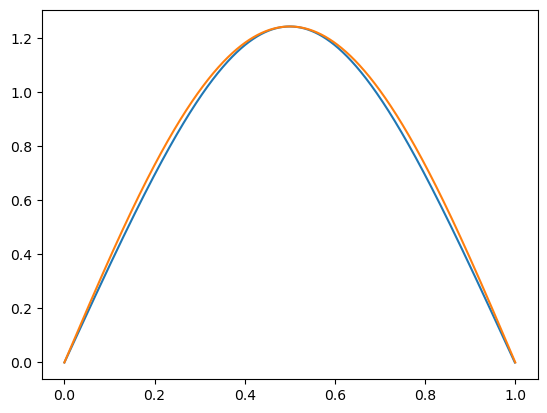

In [75]:
%%time
u = solve_pde()
plt.figure()
x = deltaX * np.arange(NX)
plt.plot(x, u)
xx = np.linspace(0,1.0,NX)
plt.plot(xx,np.sin(np.pi*xx) * np.max(u))
print(u[:3], u[-3:])

In [71]:
%%time
u = solve_pde()


CPU times: user 126 ms, sys: 535 µs, total: 127 ms
Wall time: 128 ms


[0.00000000e+00 2.11394720e-27 4.36121376e-27] [5.60637019e-27 2.71784559e-27 0.00000000e+00]
CPU times: user 18.1 ms, sys: 3.07 ms, total: 21.2 ms
Wall time: 19.3 ms


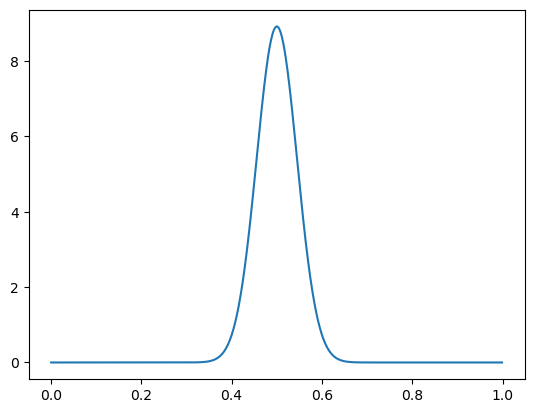

In [18]:
%%time
u = solve_pde()
plt.figure()
x = deltaX * np.arange(NX)
plt.plot(x, u)
print(u[:3], u[-3:])

In [26]:
# Alternative: numpy arrays
def solve_pde_numpy():
    u_alt = 1.0*u_0  # oder u_alt = u_0.copy()
    u_alt[0] = u_L
    u_alt[NX-1] = u_R
    u = 1.0*u_alt
    for n in range(NT):
        u[1:NX-1] = (1-2*alpha)*u_alt[1:NX-1] + alpha*(u_alt[:NX-2] + u_alt[2:])
        u_alt = 1.0*u
    return u

In [24]:
%%time
u = solve_pde_numpy()

CPU times: user 169 ms, sys: 2.86 ms, total: 172 ms
Wall time: 172 ms


[0.00000000e+00 2.11394720e-27 4.36121376e-27] [5.60637019e-27 2.71784559e-27 0.00000000e+00]
CPU times: user 17.8 ms, sys: 2.64 ms, total: 20.4 ms
Wall time: 18.7 ms


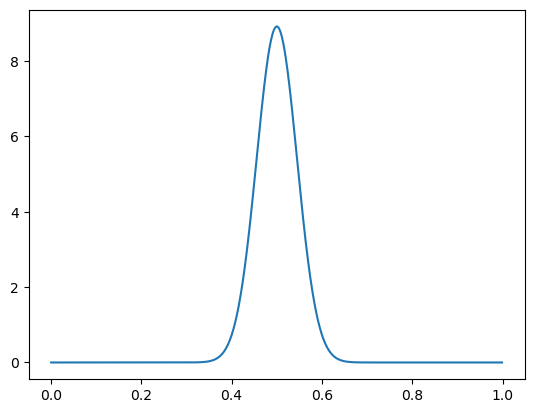

In [25]:
%%time
u = solve_pde()
plt.figure()
x = deltaX * np.arange(NX)
plt.plot(x, u)
print(u[:3], u[-3:])

[0. 0. 0.] [0. 0. 0.]


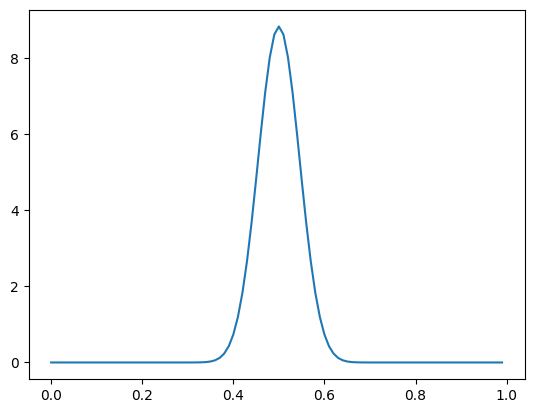

In [87]:
plt.figure()
x = deltaX * np.arange(NX)
plt.plot(x, u)
print(u[:3], u[-3:])